In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Сессии

In [2]:
df_ga_sessions = pd.read_csv('ga_sessions.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_12100\434350226.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ga_sessions = pd.read_csv('ga_sessions.csv')


In [3]:
df_s = df_ga_sessions.copy()

In [4]:
df_s.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


## Описание колонок

session_id — ID визита;

client_id — ID посетителя;

visit_date — дата визита;

visit_time — время визита;

visit_number — порядковый номер визита клиента;

utm_source — канал привлечения;

utm_medium — тип привлечения;

utm_campaign — рекламная кампания;

utm_keyword — ключевое слово;

device_category — тип устройства;

device_os — ОС устройства;

device_brand — марка устройства;

device_model — модель устройства;

device_screen_resolution — разрешение экрана;

device_brand — марка устройства;

device_model — модель устройства;

device_screen_resolution — разрешение экрана;

device_browser — браузер;

geo_country — страна;

geo_city — город

In [5]:
df_s.shape

(1860042, 18)

In [6]:
df_s.columns

Index(['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number',
       'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'utm_keyword', 'device_category', 'device_os', 'device_brand',
       'device_model', 'device_screen_resolution', 'device_browser',
       'geo_country', 'geo_city'],
      dtype='object')

In [7]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


In [8]:
# кол-во пропусков
df_s.isnull().sum()

session_id                        0
client_id                         0
visit_date                        0
visit_time                        0
visit_number                      0
utm_source                       97
utm_medium                        0
utm_campaign                 219603
utm_adcontent                335615
utm_keyword                 1082061
device_category                   0
device_os                   1070138
device_brand                 367178
device_model                1843704
device_screen_resolution          0
device_browser                    0
geo_country                       0
geo_city                          0
dtype: int64

In [9]:
# процент пропусков
df_s.isnull().sum ()/ len(df_s)* 100

session_id                   0.000000
client_id                    0.000000
visit_date                   0.000000
visit_time                   0.000000
visit_number                 0.000000
utm_source                   0.005215
utm_medium                   0.000000
utm_campaign                11.806346
utm_adcontent               18.043410
utm_keyword                 58.174009
device_category              0.000000
device_os                   57.533002
device_brand                19.740307
device_model                99.121633
device_screen_resolution     0.000000
device_browser               0.000000
geo_country                  0.000000
geo_city                     0.000000
dtype: float64

## Поработаем с пропусками

In [10]:
# удалим колонку, где больше 99% пропусков
df_s = df_s.drop(columns='device_model')

In [11]:
# заполним пропуски в канале привлечения модой
df_s.utm_source = df_s.utm_source.fillna(df_s.utm_source.mode()[0])

In [12]:
# заполним пропуски в рекламной кампании  модами по странам, а потом где не оказалось значения, те строчки удалим
dict_for_moda_utm_campaign = {}

In [13]:
for i in df_s.geo_country.unique():
    moda = df_s[df_s['geo_country']==i].utm_campaign.mode()
    if len(moda) == 0:
        continue
    else:
        dict_for_moda_utm_campaign[i] = moda[0]

In [14]:
def func_utm_campaign(row):
    for k,v in dict_for_moda_utm_campaign.items():
        if row['geo_country'] == k:
            return v

In [15]:
df_s['utm_campaign'] = df_s.apply(func_utm_campaign,axis=1)

In [16]:
df_s = df_s.dropna(subset='utm_campaign')

In [17]:
df_s = df_s.drop(columns=['utm_adcontent','utm_keyword'])

In [18]:
# заполним ОС по аналогии с рекламной кампанией, только учитывая модель устройств
dict_for_moda_device_os = {}

In [19]:
for i in df_s.device_brand.unique():
    moda = df_s[df_s['device_brand']==i].device_os.mode()
    if len(moda) == 0:
        continue
    else:
        dict_for_moda_device_os[i] = moda[0]

In [20]:
def func_device_os(row):
    for k,v in dict_for_moda_device_os.items():
        if row['device_brand'] == k:
            return v

In [21]:
df_s['device_os'] = df_s.apply(func_device_os,axis=1)

In [22]:
# Удалим оставшиеся пропуски в ОС и бренде
df_s = df_s.dropna(subset='device_os')

In [23]:
df_s = df_s.dropna(subset='device_brand')

In [24]:
# Убедимся, что пропусков не осталось
df_s.isnull().sum()

session_id                  0
client_id                   0
visit_date                  0
visit_time                  0
visit_number                0
utm_source                  0
utm_medium                  0
utm_campaign                0
device_category             0
device_os                   0
device_brand                0
device_screen_resolution    0
device_browser              0
geo_country                 0
geo_city                    0
dtype: int64

In [25]:
df_s.shape

(1492784, 15)

In [26]:
df_s.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,mobile,Android,Huawei,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,LTuZkdKfxRGVceoWkVyg,mobile,Android,Samsung,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,mobile,Android,Huawei,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,mobile,Android,Xiaomi,393x786,Chrome,Russia,Moscow


In [27]:
# Изменим тип данных в колонке даты
df_s['visit_date'] = pd.to_datetime(df_s['visit_date'])

In [28]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1492784 entries, 0 to 1860040
Data columns (total 15 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   session_id                1492784 non-null  object        
 1   client_id                 1492784 non-null  object        
 2   visit_date                1492784 non-null  datetime64[ns]
 3   visit_time                1492784 non-null  object        
 4   visit_number              1492784 non-null  int64         
 5   utm_source                1492784 non-null  object        
 6   utm_medium                1492784 non-null  object        
 7   utm_campaign              1492784 non-null  object        
 8   device_category           1492784 non-null  object        
 9   device_os                 1492784 non-null  object        
 10  device_brand              1492784 non-null  object        
 11  device_screen_resolution  1492784 non-null  object     

# События

In [29]:
df_ga_hits = pd.read_csv('ga_hits.csv')

In [30]:
df_h = df_ga_hits.copy()

In [31]:
df_h.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


## Описание колонок
session_id — ID визита;

hit_date — дата события;

hit_time — время события;

hit_number — порядковый номер события в рамках сессии;

hit_type — тип события;

hit_referer — источник события;

hit_page_path — страница события;

event_category — тип действия;

event_action — действие;

event_label — тег действия;

event_value — значение результата действия


In [32]:
df_h.shape

(15726470, 11)

In [33]:
df_h.columns

Index(['session_id', 'hit_date', 'hit_time', 'hit_number', 'hit_type',
       'hit_referer', 'hit_page_path', 'event_category', 'event_action',
       'event_label', 'event_value'],
      dtype='object')

In [34]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ GB


In [35]:
# кол-во пропусков
df_h.isnull().sum()

session_id               0
hit_date                 0
hit_time           9160322
hit_number               0
hit_type                 0
hit_referer        6274804
hit_page_path            0
event_category           0
event_action             0
event_label        3760184
event_value       15726470
dtype: int64

In [36]:
# процент пропусков
df_h.isnull().sum ()/ len(df_h)* 100

session_id          0.000000
hit_date            0.000000
hit_time           58.247795
hit_number          0.000000
hit_type            0.000000
hit_referer        39.899634
hit_page_path       0.000000
event_category      0.000000
event_action        0.000000
event_label        23.909905
event_value       100.000000
dtype: float64

## Поработаем с пропусками

In [37]:
# удалим колонку,где все значения пропущены
df_h = df_h.drop(columns='event_value')

In [38]:
# время события тоже удалим, т.к будет достаточно даты, в рамках этой работы
df_h = df_h.drop(columns='hit_time')

In [39]:
df_h = df_h.drop(columns='event_label')

In [40]:
# Источник события очень важный параметр, который не хотелось бы исказить. 
# Поэтому принято решение удалить строки, где источник пропущен
df_h = df_h.dropna(subset='hit_referer')

In [41]:
# Убедимся, что пропусков не осталось
df_h.isnull().sum()

session_id        0
hit_date          0
hit_number        0
hit_type          0
hit_referer       0
hit_page_path     0
event_category    0
event_action      0
dtype: int64

In [42]:
df_h.shape

(9451666, 8)

In [43]:
# Изменим тип данных в колонке даты
df_h['hit_date'] = pd.to_datetime(df_h['hit_date'])

In [44]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9451666 entries, 8 to 15726447
Data columns (total 8 columns):
 #   Column          Dtype         
---  ------          -----         
 0   session_id      object        
 1   hit_date        datetime64[ns]
 2   hit_number      int64         
 3   hit_type        object        
 4   hit_referer     object        
 5   hit_page_path   object        
 6   event_category  object        
 7   event_action    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 649.0+ MB


# Проведем проверки гипотез

## 1-я гипотеза:  Органический трафик не отличается от платного с точки зрения CR в целевые события

In [45]:
# сделаем группы типа трафика по типу привлечения
df_s['utm_medium'].unique()

array(['banner', 'cpm', 'cpc', 'organic', '(none)', 'referral', 'smm',
       'stories', 'blogger_channel', 'blogger_stories', 'app', 'vk_smm',
       'cpv', 'push', 'partner', 'tg', 'cpa', 'email', 'post',
       'smartbanner', 'info_text', 'clicks', 'landing', 'blogger_header',
       '(not set)', 'nkp', 'google_cpc', 'outlook', 'sms', 'article',
       'users_msk', 'fb_smm', 'Sbol_catalog', 'ok_smm',
       'landing_interests', 'yandex_cpc', 'web_polka', 'static',
       'sber_app', 'promo_sbol', 'reach', 'desktop', 'catalogue',
       'main_polka', 'qrcodevideo'], dtype=object)

In [46]:
def func_add_type_traffic(row):
    if row['utm_medium'] in ('organic', 'referral', '(none)'):
        return 'organic'
    else: 
        return 'inorganic'
    

In [47]:
df_s['type_traffic'] = df_s.apply(func_add_type_traffic, axis = 1)

In [48]:
# целевое и нецелевое действие
def func_add_type_action(row):
    if row['event_action'].strip().lower() in ['sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click']:
        return 1
    else: 
        return 0

In [49]:
df_h['type_action'] = df_h.apply(func_add_type_action, axis = 1)

In [50]:
df_s.columns

Index(['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number',
       'utm_source', 'utm_medium', 'utm_campaign', 'device_category',
       'device_os', 'device_brand', 'device_screen_resolution',
       'device_browser', 'geo_country', 'geo_city', 'type_traffic'],
      dtype='object')

In [51]:
df_h.columns

Index(['session_id', 'hit_date', 'hit_number', 'hit_type', 'hit_referer',
       'hit_page_path', 'event_category', 'event_action', 'type_action'],
      dtype='object')

In [52]:
# проверим могут ли быть визиты разных трафиков
df_s.groupby('session_id',as_index=False).type_traffic.nunique().sort_values(by='type_traffic', ascending=False)

,session_id,type_traffic
0,1000009318903347362.1632663668.1632663668,1
995197,6541757835132718299.1639369947.1639369947,1
995195,6541748781343231317.1640942954.1640942954,1
995194,6541736725362546730.1636155857.1636155857,1
995193,6541736725362546730.1633458218.1633458218,1
...,...,...
497592,3774445749866161708.1623287339.1623287339,1
497591,3774445307494990818.1633747942.1633747942,1
497590,3774441356129793959.1638463403.1638463403,1
497589,3774438564396519316.1633931155.1633931155,1


In [53]:
# значит они независимы

In [54]:
df_1 = pd.merge(df_h, df_s, left_on = ['session_id'], right_on = ['session_id'])

In [55]:
df_1.columns

Index(['session_id', 'hit_date', 'hit_number', 'hit_type', 'hit_referer',
       'hit_page_path', 'event_category', 'event_action', 'type_action',
       'client_id', 'visit_date', 'visit_time', 'visit_number', 'utm_source',
       'utm_medium', 'utm_campaign', 'device_category', 'device_os',
       'device_brand', 'device_screen_resolution', 'device_browser',
       'geo_country', 'geo_city', 'type_traffic'],
      dtype='object')

In [56]:
# посчитаем кол-во уникальных сессий
df_uniq_ses = df_1.groupby(['visit_date','type_traffic'],as_index=False).agg({'session_id':'nunique'})

In [57]:
# посчитаем кол-во целевых действий 
df_count_act = df_1.groupby(['visit_date','type_traffic','session_id'],as_index=False).type_action.sum()

In [58]:
# посчитаем все целевые действия как одно, в рамках одного визита
df_count_act['type_action'] = np.where((df_count_act.type_action > 1), 1, df_count_act.type_action)


In [59]:
df_count_act = df_count_act.groupby(['visit_date','type_traffic'],as_index=False).type_action.sum()

In [60]:
df_1 = pd.merge(df_uniq_ses,df_count_act, on=['visit_date','type_traffic'])

In [61]:
# посчитаем конверсии по датам
df_1['CR'] = df_1['type_action'] / df_1['session_id']

In [62]:
df_1 = df_1[['visit_date','type_traffic', 'CR']]

In [63]:
df_1

,visit_date,type_traffic,CR
0,2021-05-19,inorganic,0.000000
1,2021-05-19,organic,0.069401
2,2021-05-21,inorganic,0.000000
3,2021-05-21,organic,0.000000
4,2021-05-22,inorganic,0.019608
...,...,...,...
447,2021-12-29,organic,0.012876
448,2021-12-30,inorganic,0.007862
449,2021-12-30,organic,0.029940
450,2021-12-31,inorganic,0.004392


### Посмотрим распределения

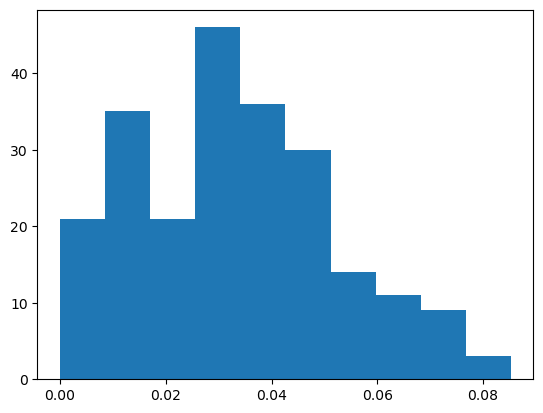

In [64]:
plt.hist(df_1[df_1['type_traffic']=='organic'].CR);

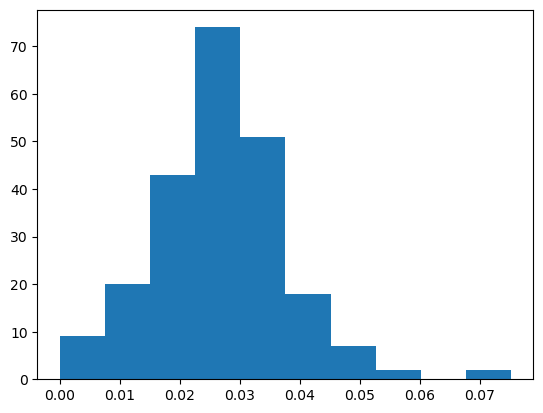

In [65]:
plt.hist(df_1[df_1['type_traffic']=='inorganic'].CR);

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


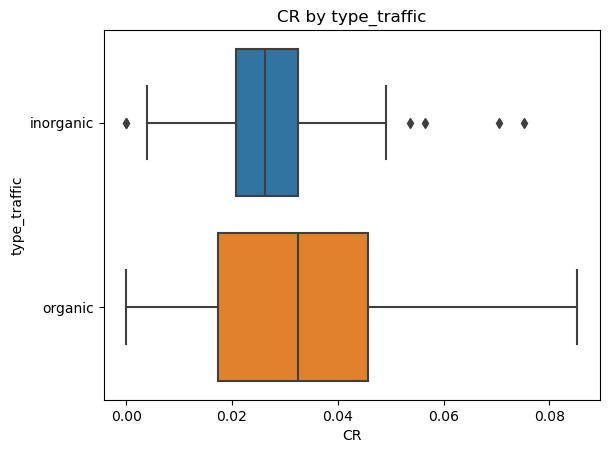

In [66]:
sns.boxplot(x = 'CR', y = 'type_traffic', data = df_1, orient = 'h').set(title = 'CR by type_traffic');

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

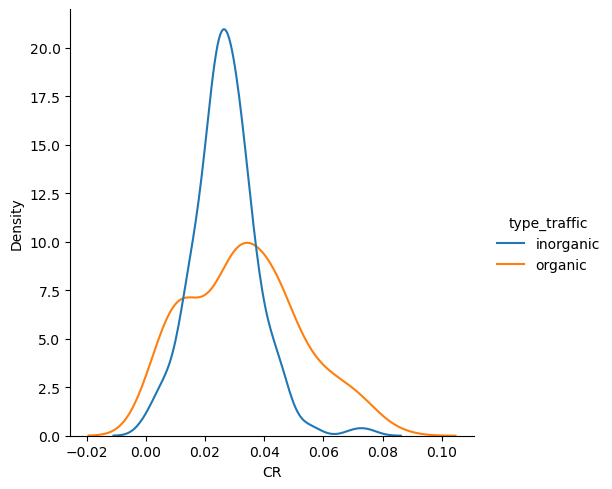

In [67]:
sns.displot(data=df_1, x='CR', hue='type_traffic', fill = False, kind = 'kde');

### По распределениям нельзя сказать, что они нормальные

### Проведем тест на нормальность Шапиро-Уилка. Уровень значимости возьмем 5%
    - H0: данные распределены нормально 
    - H1: данные распределены ненормально

In [68]:
a = 0.05

for i in df_1.type_traffic.unique():
    x = stats.shapiro(df_1.loc[df_1.type_traffic == i, 'CR'])[1]
    if x > 0.05:
        print(f'Данные из группы {i} распределены нормально, p-value = {x}')
    else:
        print(f'Данные из группы {i} распределены ненормально, p-value = {x}')

Данные из группы inorganic распределены ненормально, p-value = 5.508333197212778e-05
Данные из группы organic распределены ненормально, p-value = 0.001452930853702128


### Так как наши данные имеют не нормальное распределение, а также независимы, то мы можем применить тест Манна-Уитни. Уровень значимость 5%
    - H0: Органический трафик не отличается от платного с точки зрения CR в целевые события
    - H1: Органический трафик отличается от платного с точки зрения CR в целевые события

In [69]:
p = stats.mannwhitneyu(df_1[df_1.type_traffic == 'organic'].CR, df_1[df_1.type_traffic == 'inorganic'].CR)[1]
if p > a:
    print(f'Мы не может отвергнуть нулевую гипотезу, т.к p-value = {p}')
else:
    print(f'Мы можем отвергнуть нулевую гипотезу, т.к p-value = {p}')

Мы можем отвергнуть нулевую гипотезу, т.к p-value = 5.8025622294004935e-05


    - H0: Органический трафик меньше от платного с точки зрения CR в целевые события
    - H1: Органический трафик больше от платного с точки зрения CR в целевые события

In [70]:
p = stats.mannwhitneyu(df_1[df_1.type_traffic == 'organic'].CR, df_1[df_1.type_traffic == 'inorganic'].CR, alternative='less')[1]
if p > a:
    print(f'Мы не может отвергнуть нулевую гипотезу, т.к p-value = {p}')
else:
    print(f'Мы можем отвергнуть нулевую гипотезу, т.к p-value = {p}')

Мы не может отвергнуть нулевую гипотезу, т.к p-value = 0.999971075763216


### Делаем вывод, что органический трафик отличается от платного с точки зрения CR в целевые действия
### И что органический трафик меньше платного с точки зрения CR в целевые действия

## 2-я гипотеза: Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR в целевые события

In [71]:
df_2 = pd.merge(df_h, df_s, left_on = ['session_id'], right_on = ['session_id'])

In [72]:
df_2.columns

Index(['session_id', 'hit_date', 'hit_number', 'hit_type', 'hit_referer',
       'hit_page_path', 'event_category', 'event_action', 'type_action',
       'client_id', 'visit_date', 'visit_time', 'visit_number', 'utm_source',
       'utm_medium', 'utm_campaign', 'device_category', 'device_os',
       'device_brand', 'device_screen_resolution', 'device_browser',
       'geo_country', 'geo_city', 'type_traffic'],
      dtype='object')

In [73]:
df_2.device_category.unique()

array(['mobile', 'tablet', 'desktop'], dtype=object)

In [74]:
df_2.device_category.value_counts()

device_category
mobile     6632583
tablet       95466
desktop        301
Name: count, dtype: int64

In [75]:
def add_is_mobile(row):
    if row['device_category'] in (['mobile']):
        return 'is_mobile'
    else:
        return 'no_mobile'

In [76]:
df_2['is_mobile'] = df_2.apply(add_is_mobile, axis = 1)

In [77]:
# посчитаем кол-во уникальных сессий
df_uniq_ses = df_2.groupby(['visit_date','is_mobile'],as_index=False).agg({'session_id':'nunique'})

In [78]:
# посчитаем кол-во целевых действий 
df_count_act = df_2.groupby(['visit_date','is_mobile','session_id'],as_index=False).type_action.sum()

In [79]:
# посчитаем все целевые действия как одно, в рамках одного визита
df_count_act['type_action'] = np.where((df_count_act.type_action > 1), 1, df_count_act.type_action)

In [80]:
df_count_act = df_count_act.groupby(['visit_date','is_mobile'],as_index=False).type_action.sum()

In [81]:
df_2 = pd.merge(df_uniq_ses,df_count_act, on=['visit_date','is_mobile'])

In [82]:
# посчитаем конверсии по датам
df_2['CR'] = df_2['type_action'] / df_2['session_id']

In [83]:
df_2 = df_2[['visit_date','is_mobile', 'CR']]

In [84]:
df_2

,visit_date,is_mobile,CR
0,2021-05-19,is_mobile,0.069841
1,2021-05-19,no_mobile,0.000000
2,2021-05-21,is_mobile,0.000000
3,2021-05-21,no_mobile,0.000000
4,2021-05-22,is_mobile,0.013944
...,...,...,...
447,2021-12-29,no_mobile,0.000000
448,2021-12-30,is_mobile,0.011436
449,2021-12-30,no_mobile,0.062500
450,2021-12-31,is_mobile,0.005161


### Посмотрим распределения

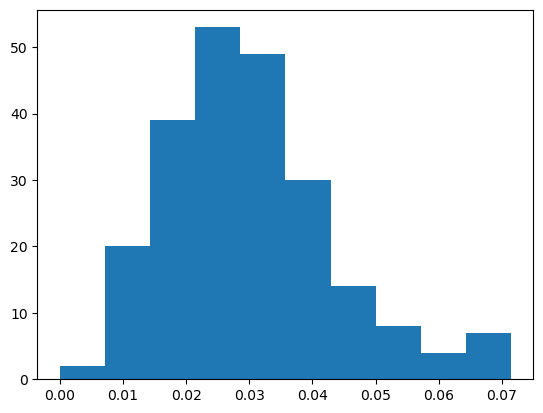

In [85]:
plt.hist(df_2[df_2['is_mobile']=='is_mobile'].CR);

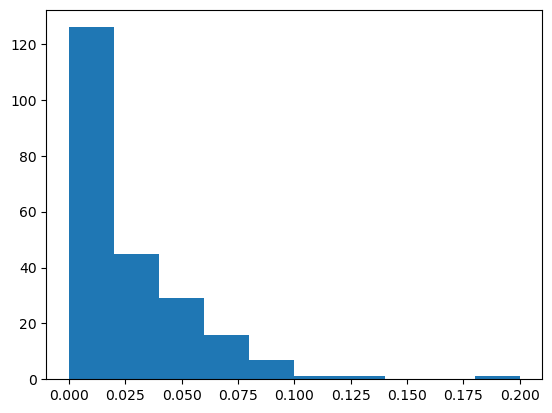

In [86]:
plt.hist(df_2[df_2['is_mobile']=='no_mobile'].CR);

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


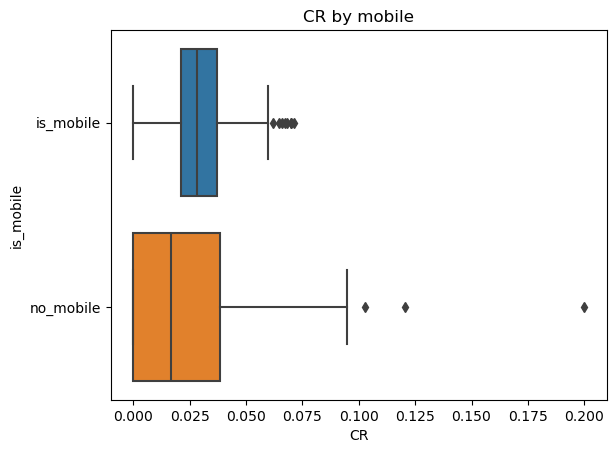

In [87]:
sns.boxplot(x = 'CR', y = 'is_mobile', data = df_2, orient = 'h').set(title = 'CR by mobile');

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

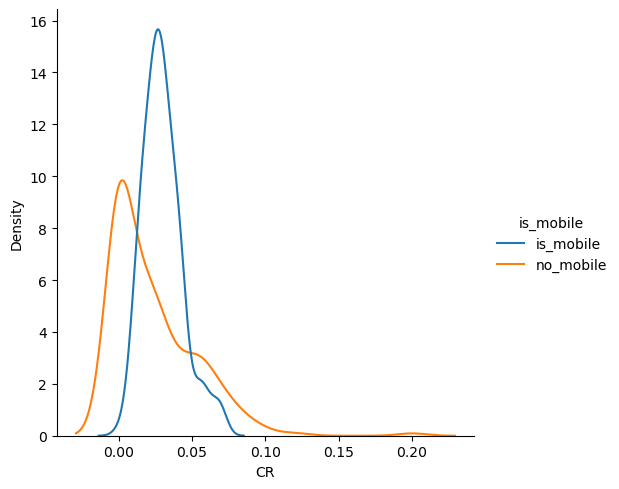

In [88]:
sns.displot(data=df_2, x='CR', hue='is_mobile', fill = False, kind = 'kde');

### Проведем тест на нормальность Шапиро-Уилка. Уровень значимости возьмем 5%
    - H0: данные распределены нормально 
    - H1: данные распределены ненормально

In [90]:
a = 0.05

for i in df_2.is_mobile.unique():
    x = stats.shapiro(df_2.loc[df_2.is_mobile == i, 'CR'])[1]
    if x > 0.05:
        print(f'Данные из группы {i} распределены нормально, p-value = {x}')
    else:
        print(f'Данные из группы {i} распределены ненормально, p-value = {x}')

Данные из группы is_mobile распределены ненормально, p-value = 3.7860654629184864e-06
Данные из группы no_mobile распределены ненормально, p-value = 1.9011911257984908e-16


### Так как наши данные имеют не нормальное распределение, а также независимы, то мы можем применить тест Манна-Уитни. Уровень значимость 5%
    - H0: Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR в целевые события
    - H1: Трафик с мобильных устройств отличается от трафика с десктопных устройств с точки зрения CR в целевые события

In [92]:
p = stats.mannwhitneyu(df_2[df_2.is_mobile == 'is_mobile'].CR, df_2[df_2.is_mobile == 'no_mobile'].CR)[1]
if p > a:
    print(f'Мы не может отвергнуть нулевую гипотезу, т.к p-value = {p}')
else:
    print(f'Мы можем отвергнуть нулевую гипотезу, т.к p-value = {p}')

Мы можем отвергнуть нулевую гипотезу, т.к p-value = 1.66652181309219e-08


    - H0: Трафик с мобильных устройств меньше трафика с десктопных устройств с точки зрения CR в целевые события
    - H1: Трафик с мобильных устройств больше трафика с десктопных устройств с точки зрения CR в целевые события

In [94]:
p = stats.mannwhitneyu(df_2[df_2.is_mobile == 'is_mobile'].CR, df_2[df_2.is_mobile == 'no_mobile'].CR, alternative='less')[1]
if p > a:
    print(f'Мы не может отвергнуть нулевую гипотезу, т.к p-value = {p}')
else:
    print(f'Мы можем отвергнуть нулевую гипотезу, т.к p-value = {p}')

Мы не может отвергнуть нулевую гипотезу, т.к p-value = 0.9999999917023484


### Делаем вывод, что трафик с мобильных устройств отличается от трафика с десктопных устройств с точки зрения CR в целевые действия
### И что трафик с мобильных устройств меньше трафика с десктопных устройств с точки зрения CR в целевые действия

## 3-я гипотеза: Трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR в целевые события

In [202]:
df_3 = pd.merge(df_h, df_s, left_on = ['session_id'], right_on = ['session_id'])

In [203]:
df_3.columns

Index(['session_id', 'hit_date', 'hit_number', 'hit_type', 'hit_referer',
       'hit_page_path', 'event_category', 'event_action', 'type_action',
       'client_id', 'visit_date', 'visit_time', 'visit_number', 'utm_source',
       'utm_medium', 'utm_campaign', 'device_category', 'device_os',
       'device_brand', 'device_screen_resolution', 'device_browser',
       'geo_country', 'geo_city', 'type_traffic'],
      dtype='object')

In [204]:
def add_type_city(row):
    if row['geo_city'] in (['Saint Petersburg','Moscow']):
        return 'target_city'
    else:
        return 'other_city'

In [205]:
df_3['type_city'] = df_3.apply(add_type_city, axis = 1)

In [206]:
df_3.type_city.value_counts()

target_city    4221751
other_city     2506599
Name: type_city, dtype: int64

In [207]:
# посчитаем кол-во уникальных сессий
df_uniq_ses = df_3.groupby(['visit_date','type_city'],as_index=False).agg({'session_id':'nunique'})

In [208]:
# посчитаем кол-во целевых действий 
df_count_act = df_3.groupby(['visit_date','type_city','session_id'],as_index=False).type_action.sum()

In [209]:
# посчитаем все целевые действия как одно, в рамках одного визита
df_count_act['type_action'] = np.where((df_count_act.type_action > 1), 1, df_count_act.type_action)

In [210]:
df_count_act = df_count_act.groupby(['visit_date','type_city'],as_index=False).type_action.sum()

In [211]:
df_3 = pd.merge(df_uniq_ses,df_count_act, on=['visit_date','type_city'])

In [212]:
# посчитаем конверсии по датам
df_3['CR'] = df_3['type_action'] / df_3['session_id']

In [213]:
df_3 = df_3[['visit_date','type_city', 'CR']]

In [214]:
df_3

,visit_date,type_city,CR
0,2021-05-19,other_city,0.000000
1,2021-05-19,target_city,0.128655
2,2021-05-21,other_city,0.000000
3,2021-05-21,target_city,0.000000
4,2021-05-22,other_city,0.005051
...,...,...,...
447,2021-12-29,target_city,0.018282
448,2021-12-30,other_city,0.018450
449,2021-12-30,target_city,0.009398
450,2021-12-31,other_city,0.003030


### Посмотрим распределения

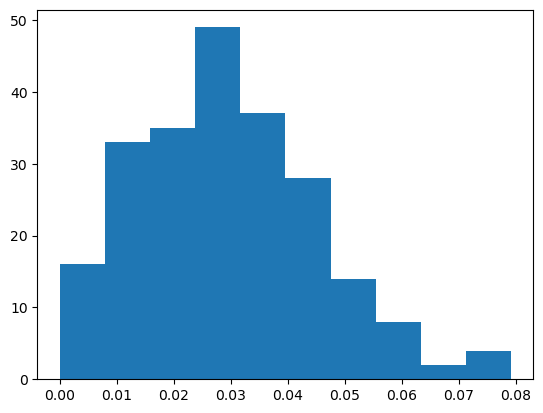

In [215]:
plt.hist(df_3[df_3['type_city']=='other_city'].CR);

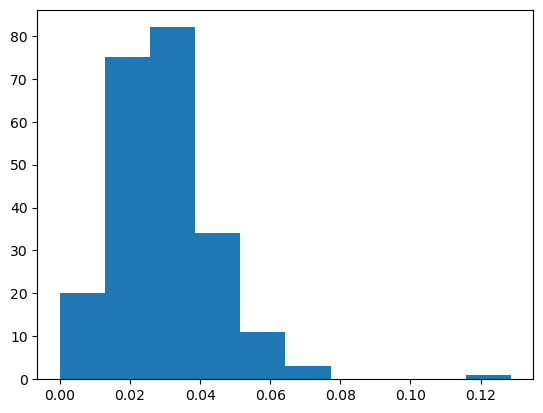

In [216]:
plt.hist(df_3[df_3['type_city']=='target_city'].CR);

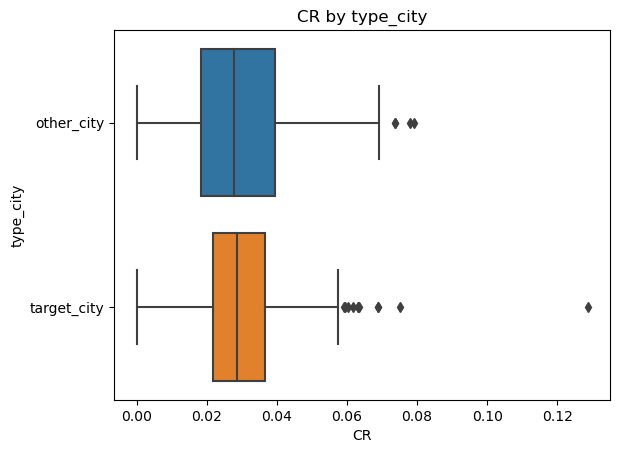

In [217]:
sns.boxplot(x = 'CR', y = 'type_city', data = df_3, orient = 'h').set(title = 'CR by type_city');

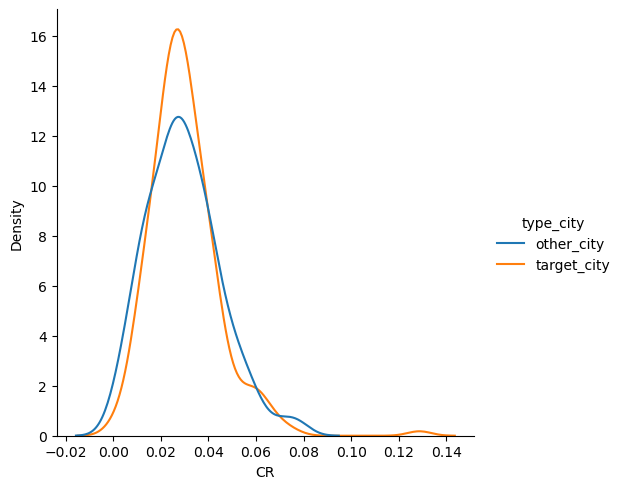

In [218]:
sns.displot(data=df_3, x='CR', hue='type_city', fill = False, kind = 'kde');

### По гистограммам и графикам распределения похожи на нормальные, сделаем тест  Шапиро-Уилка на нормальность. Уровень значимости 5%

    - H0: распределение нормально
    - H1: распределение ненормальное

In [219]:
a = 0.05

for i in df_3.type_city.unique():
    x = stats.shapiro(df_3.loc[df_3.type_city == i, 'CR'])[1]
    if x > 0.05:
        print(f'Данные из группы {i} распределены нормально, p-value = {x}')
    else:
        print(f'Данные из группы {i} распределены ненормально, p-value = {x}')

Данные из группы other_city распределены ненормально, p-value = 0.0007322749006561935
Данные из группы target_city распределены ненормально, p-value = 2.5309103771076202e-11


### Так как наши данные имеют не нормальное распределение, а также независимы, то мы можем применить тест Манна-Уитни. Уровень значимость 5%
    - H0: Органический трафик не отличается от платного с точки зрения CR в целевые события
    - H1: Органический трафик отличается от платного с точки зрения CR в целевые события

In [220]:
p = stats.mannwhitneyu(df_3[df_3.type_city == 'target_city'].CR, df_3[df_3.type_city == 'other_city'].CR)[1]
if p > a:
    print(f'Мы не может отвергнуть нулевую гипотезу, т.к p-value = {p}')
else:
    print(f'Мы можем отвергнуть нулевую гипотезу, т.к p-value = {p}')

Мы не может отвергнуть нулевую гипотезу, т.к p-value = 0.8021092702401426


### Делаем вывод, что трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR в целевые события

## Продуктовая аналитика

### Посмотрим из каких источников / кампаний / устройств / локаций к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)

### Рекламные кампании

In [309]:
df_itog = pd.merge(df_h, df_s, left_on = ['session_id'], right_on = ['session_id'])

In [310]:
df_itog.columns

Index(['session_id', 'hit_date', 'hit_number', 'hit_type', 'hit_referer',
       'hit_page_path', 'event_category', 'event_action', 'type_action',
       'client_id', 'visit_date', 'visit_time', 'visit_number', 'utm_source',
       'utm_medium', 'utm_campaign', 'device_category', 'device_os',
       'device_brand', 'device_screen_resolution', 'device_browser',
       'geo_country', 'geo_city', 'type_traffic', 'marketing'],
      dtype='object')

In [311]:
df_itog

,session_id,hit_date,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,type_action,client_id,...,utm_campaign,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,type_traffic,marketing
0,4555345648396008371.1640233907.1640233907,2021-12-23,4,event,trXmoxcphNjuYcShOXwL,sberauto.com/cars/all/nissan/qashqai/bfc21661?...,card_web,view_card,0,1060624059.164023,...,LTuZkdKfxRGVceoWkVyg,mobile,iOS,Apple,2000x2000,Safari,United States,Prineville,inorganic,advertising on social networks
1,4555345648396008371.1640233907.1640233907,2021-12-23,3,event,trXmoxcphNjuYcShOXwL,sberauto.com/cars/all/nissan/qashqai/bfc21661?...,card_web,view_new_card,0,1060624059.164023,...,LTuZkdKfxRGVceoWkVyg,mobile,iOS,Apple,2000x2000,Safari,United States,Prineville,inorganic,advertising on social networks
2,9063469723165129646.1640233902.1640233902,2021-12-23,3,event,uMnMdxLOIznakHyXLoMC,sberauto.com/cars/all/skoda/rapid/bf24b977?ren...,card_web,view_card,0,2110253489.164024,...,LTuZkdKfxRGVceoWkVyg,tablet,Android,Google,360x480,Chrome,United States,Prineville,inorganic,advertising on social networks
3,9063469723165129646.1640233902.1640233902,2021-12-23,4,event,uMnMdxLOIznakHyXLoMC,sberauto.com/cars/all/skoda/rapid/bf24b977?ren...,card_web,view_new_card,0,2110253489.164024,...,LTuZkdKfxRGVceoWkVyg,tablet,Android,Google,360x480,Chrome,United States,Prineville,inorganic,advertising on social networks
4,8279923128365523547.1640276571.1640276571,2021-12-23,3,event,uMnMdxLOIznakHyXLoMC,sberauto.com/cars/all/porsche/911/f149c91b?ren...,card_web,view_card,0,1927819831.164028,...,LTuZkdKfxRGVceoWkVyg,tablet,Android,Google,360x480,Chrome,Ireland,Dublin,inorganic,advertising on social networks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6728345,3810094957689013029.1636795176.1636795176,2021-11-13,4,event,NfSAiKHBqffzsXrbjcSr,podpiska.sberauto.com/,sub_page_view,sub_landing,0,887106861.163679,...,LTuZkdKfxRGVceoWkVyg,mobile,Android,Huawei,360x640,Chrome,Russia,Moscow,inorganic,advertising on social networks
6728346,5384662665988593849.1636751459.1636751459,2021-11-13,4,event,NfSAiKHBqffzsXrbjcSr,podpiska.sberauto.com/,sub_page_view,sub_landing,0,1253714474.163675,...,LTuZkdKfxRGVceoWkVyg,mobile,Android,Samsung,412x892,Chrome,Russia,Ruza,inorganic,advertising on social networks
6728347,7863501185449165315.1636799949.1636799949,2021-11-13,3,event,eAbATQERmGPolIKkWXkU,podpiska.sberauto.com/,sub_page_view,sub_landing,0,1830864042.1636794883,...,LTuZkdKfxRGVceoWkVyg,mobile,iOS,Apple,414x896,Safari,Russia,Malakhovka,inorganic,other
6728348,2836605783570805648.1636810116.1636810116,2021-11-13,1,event,sAGDBCdeVPmQPwkVEcIX,podpiska.sberauto.com/,sub_button_click,sub_view_cars_click,0,660448750.1636725648,...,LTuZkdKfxRGVceoWkVyg,mobile,Android,Xiaomi,360x640,Chrome,Russia,Moscow,inorganic,other


In [224]:
df_metrics = df_itog.groupby('utm_campaign',as_index=False).agg(uniq_session=('session_id','nunique'), 
                                                  total_sessions=('session_id','count'))

In [225]:
# посчитаем кол-во целевых действий 
df_count_act = df_itog.groupby(['utm_campaign','session_id'],as_index=False).type_action.sum()

In [226]:
# посчитаем все целевые действия как одно, в рамках одного визита
df_count_act['type_action'] = np.where((df_count_act.type_action > 1), 1, df_count_act.type_action)

In [227]:
df_count_act = df_count_act.groupby(['utm_campaign'],as_index=False).type_action.sum()

In [228]:
# целевые действия за сессию
df_count_act

,utm_campaign,type_action
0,FTjNLDyTrXaWYgZymFkV,19
1,LEoPHuyFvzoNfnzGgfcd,20
2,LTuZkdKfxRGVceoWkVyg,26429
3,LUlvACDKkkOkiSuiwaBs,0
4,LliRUcMuIXWdLyWHGyiO,0
5,XHNUiSKKGTEpSAlaVMFQ,0
6,gecBYcKZCPMcVYdSSzKP,0
7,vRLTQQKAsFQMxbcHGPhu,0


In [229]:
df_metrics = pd.merge(df_metrics, df_count_act, on='utm_campaign')

In [230]:
df_metrics = df_metrics.rename(columns={'type_action':'count_target_action'})

In [231]:
df_metrics['CR'] = df_metrics['count_target_action'] / df_metrics['uniq_session']

In [232]:
# Топ 10 рекламных кампаний по CR
df_metrics.sort_values(by=['CR','count_target_action'], ascending=False).head(10)

,utm_campaign,uniq_session,total_sessions,count_target_action,CR
0,FTjNLDyTrXaWYgZymFkV,589,3081,19,0.032258
2,LTuZkdKfxRGVceoWkVyg,834362,6719880,26429,0.031676
1,LEoPHuyFvzoNfnzGgfcd,807,5311,20,0.024783
3,LUlvACDKkkOkiSuiwaBs,1,3,0,0.000000
4,LliRUcMuIXWdLyWHGyiO,4,17,0,0.000000
5,XHNUiSKKGTEpSAlaVMFQ,2,23,0,0.000000
6,gecBYcKZCPMcVYdSSzKP,5,33,0,0.000000
7,vRLTQQKAsFQMxbcHGPhu,1,2,0,0.000000


In [233]:
# Топ 10 рекламных кампаний по количеству целевых действий за сессию
df_metrics.sort_values(by=['count_target_action'], ascending=False).head(10)

,utm_campaign,uniq_session,total_sessions,count_target_action,CR
2,LTuZkdKfxRGVceoWkVyg,834362,6719880,26429,0.031676
1,LEoPHuyFvzoNfnzGgfcd,807,5311,20,0.024783
0,FTjNLDyTrXaWYgZymFkV,589,3081,19,0.032258
3,LUlvACDKkkOkiSuiwaBs,1,3,0,0.000000
4,LliRUcMuIXWdLyWHGyiO,4,17,0,0.000000
5,XHNUiSKKGTEpSAlaVMFQ,2,23,0,0.000000
6,gecBYcKZCPMcVYdSSzKP,5,33,0,0.000000
7,vRLTQQKAsFQMxbcHGPhu,1,2,0,0.000000


In [234]:
# Топ 10 рекламных кампаний по количеству уникалных сессий
df_metrics.sort_values(by=['uniq_session'], ascending=False).head(10)

,utm_campaign,uniq_session,total_sessions,count_target_action,CR
2,LTuZkdKfxRGVceoWkVyg,834362,6719880,26429,0.031676
1,LEoPHuyFvzoNfnzGgfcd,807,5311,20,0.024783
0,FTjNLDyTrXaWYgZymFkV,589,3081,19,0.032258
6,gecBYcKZCPMcVYdSSzKP,5,33,0,0.000000
4,LliRUcMuIXWdLyWHGyiO,4,17,0,0.000000
5,XHNUiSKKGTEpSAlaVMFQ,2,23,0,0.000000
3,LUlvACDKkkOkiSuiwaBs,1,3,0,0.000000
7,vRLTQQKAsFQMxbcHGPhu,1,2,0,0.000000


### Тип устройства

In [235]:
df_metrics = df_itog.groupby('device_category',as_index=False).agg(uniq_session=('session_id','nunique'), 
                                                  total_sessions=('session_id','count'))

In [236]:
# посчитаем кол-во целевых действий 
df_count_act = df_itog.groupby(['device_category','session_id'],as_index=False).type_action.sum()

In [237]:
# посчитаем все целевые действия как одно, в рамках одного визита
df_count_act['type_action'] = np.where((df_count_act.type_action > 1), 1, df_count_act.type_action)

In [238]:
df_count_act = df_count_act.groupby(['device_category'],as_index=False).type_action.sum()

In [239]:
df_metrics = pd.merge(df_metrics, df_count_act, on='device_category')

In [240]:
df_metrics = df_metrics.rename(columns={'type_action':'count_target_action'})

In [241]:
df_metrics['CR'] = df_metrics['count_target_action'] / df_metrics['uniq_session']

In [242]:
df_metrics.sort_values(by=['count_target_action'], ascending=False)

,device_category,uniq_session,total_sessions,count_target_action,CR
1,mobile,823635,6632583,26148,0.031747
2,tablet,12050,95466,320,0.026556
0,desktop,86,301,0,0.000000


### Браузер

In [243]:
df_metrics = df_itog.groupby('device_browser',as_index=False).agg(uniq_session=('session_id','nunique'), 
                                                  total_sessions=('session_id','count'))

In [244]:
# посчитаем кол-во целевых действий 
df_count_act = df_itog.groupby(['device_browser','session_id'],as_index=False).type_action.sum()

In [245]:
# посчитаем все целевые действия как одно, в рамках одного визита
df_count_act['type_action'] = np.where((df_count_act.type_action > 1), 1, df_count_act.type_action)

In [246]:
df_count_act = df_count_act.groupby(['device_browser'],as_index=False).type_action.sum()

In [247]:
df_metrics = pd.merge(df_metrics, df_count_act, on='device_browser')

In [248]:
df_metrics = df_metrics.rename(columns={'type_action':'count_target_action'})

In [249]:
df_metrics['CR'] = df_metrics['count_target_action'] / df_metrics['uniq_session']

In [250]:
# Топ 15 браузеров по количеству визитов
df_metrics.sort_values(by=['total_sessions'], ascending=False).head(15)

,device_browser,uniq_session,total_sessions,count_target_action,CR
4,Chrome,408539,3006213,13020,0.031870
26,Safari,253054,2224988,8673,0.034273
27,Safari (in-app),54001,508320,964,0.017852
31,YaBrowser,46273,417469,1746,0.037733
3,Android Webview,39735,337989,967,0.024336
28,Samsung Internet,25998,166016,882,0.033926
23,Opera,5818,50641,165,0.028360
7,Firefox,1460,12256,35,0.023973
30,UC Browser,496,3288,12,0.024194
2,Android Runtime,227,609,0,0.000000


In [251]:
# Топ 15 браузеров по CR
df_metrics.sort_values(by=['CR'], ascending=False).head(15)

,device_browser,uniq_session,total_sessions,count_target_action,CR
33,com.vk.vkclient,8,115,2,0.250000
18,Maxthon,10,43,1,0.100000
25,Puffin,23,130,1,0.043478
31,YaBrowser,46273,417469,1746,0.037733
26,Safari,253054,2224988,8673,0.034273
28,Samsung Internet,25998,166016,882,0.033926
4,Chrome,408539,3006213,13020,0.031870
23,Opera,5818,50641,165,0.028360
3,Android Webview,39735,337989,967,0.024336
30,UC Browser,496,3288,12,0.024194


In [252]:
# Топ 15 браузеров  по количеству целевых действий
df_metrics.sort_values(by=['count_target_action'], ascending=False).head(15)

,device_browser,uniq_session,total_sessions,count_target_action,CR
4,Chrome,408539,3006213,13020,0.031870
26,Safari,253054,2224988,8673,0.034273
31,YaBrowser,46273,417469,1746,0.037733
3,Android Webview,39735,337989,967,0.024336
27,Safari (in-app),54001,508320,964,0.017852
28,Samsung Internet,25998,166016,882,0.033926
23,Opera,5818,50641,165,0.028360
7,Firefox,1460,12256,35,0.023973
30,UC Browser,496,3288,12,0.024194
33,com.vk.vkclient,8,115,2,0.250000


### Страна

In [253]:
df_metrics = df_itog.groupby('geo_country',as_index=False).agg(uniq_session=('session_id','nunique'), 
                                                  total_sessions=('session_id','count'))

In [254]:
# посчитаем кол-во целевых действий 
df_count_act = df_itog.groupby(['geo_country','session_id'],as_index=False).type_action.sum()

In [255]:
# посчитаем все целевые действия как одно, в рамках одного визита
df_count_act['type_action'] = np.where((df_count_act.type_action > 1), 1, df_count_act.type_action)

In [256]:
df_count_act = df_count_act.groupby(['geo_country'],as_index=False).type_action.sum()

In [257]:
df_metrics = pd.merge(df_metrics, df_count_act, on='geo_country')

In [258]:
df_metrics = df_metrics.rename(columns={'type_action':'count_target_action'})

In [259]:
df_metrics['CR'] = df_metrics['count_target_action'] / df_metrics['uniq_session']

In [260]:
# Топ 10 стран по количеству визитов
df_metrics.sort_values(by=['total_sessions'], ascending=False).head(10)

,geo_country,uniq_session,total_sessions,count_target_action,CR
106,Russia,811572,6556399,25950,0.031975
133,Ukraine,4253,34391,102,0.023983
136,United States,4395,16734,36,0.008191
15,Belarus,1641,12222,22,0.013406
130,Turkey,1138,10904,33,0.028998
47,Germany,811,8110,26,0.032059
66,Kazakhstan,1129,7511,20,0.017715
135,United Kingdom,571,5198,25,0.043783
0,(not set),474,4652,14,0.029536
33,Cyprus,419,4440,11,0.026253


In [261]:
# Топ 10 стран по CR
df_metrics.sort_values(by=['CR'], ascending=False).head(10)

,geo_country,uniq_session,total_sessions,count_target_action,CR
2,Albania,20,170,4,0.200000
101,Philippines,7,132,1,0.142857
93,Nigeria,9,92,1,0.111111
1,Afghanistan,20,256,2,0.100000
115,South Africa,21,327,2,0.095238
113,Slovenia,23,183,2,0.086957
110,Seychelles,26,318,2,0.076923
85,Morocco,27,121,2,0.074074
97,Pakistan,14,100,1,0.071429
116,South Korea,43,370,3,0.069767


In [262]:
# Топ 10 стран  по количеству целевых действий
df_metrics.sort_values(by=['count_target_action'], ascending=False).head(10)

,geo_country,uniq_session,total_sessions,count_target_action,CR
106,Russia,811572,6556399,25950,0.031975
133,Ukraine,4253,34391,102,0.023983
136,United States,4395,16734,36,0.008191
130,Turkey,1138,10904,33,0.028998
47,Germany,811,8110,26,0.032059
135,United Kingdom,571,5198,25,0.043783
15,Belarus,1641,12222,22,0.013406
66,Kazakhstan,1129,7511,20,0.017715
138,Uzbekistan,557,2876,17,0.030521
0,(not set),474,4652,14,0.029536


### Посмотрим какие автомобили пользуются наибольшим спросом и у каких самый лучший показатель CR в целевые события

In [263]:
def add_mark_auto(row):
    if "sberauto.com/cars/all/" in row["hit_page_path"]:
        return row['hit_page_path'].split('/')[3]
    else:
        return 'other'

In [264]:
df_itog['mark_auto'] = df_itog.apply(add_mark_auto,axis=1)

In [265]:
def add_model_auto(row):
    if "sberauto.com/cars/all/" in row["hit_page_path"]:
        return row['hit_page_path'].split('/')[4]
    else:
        return 'other'

In [266]:
df_itog['model_auto'] = df_itog.apply(add_model_auto,axis=1)

In [267]:
df_itog['car'] = df_itog['mark_auto'] + ' ' + df_itog['model_auto']

In [268]:
df_itog

,session_id,hit_date,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,type_action,client_id,...,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,type_traffic,mark_auto,model_auto,car
0,4555345648396008371.1640233907.1640233907,2021-12-23,4,event,trXmoxcphNjuYcShOXwL,sberauto.com/cars/all/nissan/qashqai/bfc21661?...,card_web,view_card,0,1060624059.164023,...,iOS,Apple,2000x2000,Safari,United States,Prineville,inorganic,nissan,qashqai,nissan qashqai
1,4555345648396008371.1640233907.1640233907,2021-12-23,3,event,trXmoxcphNjuYcShOXwL,sberauto.com/cars/all/nissan/qashqai/bfc21661?...,card_web,view_new_card,0,1060624059.164023,...,iOS,Apple,2000x2000,Safari,United States,Prineville,inorganic,nissan,qashqai,nissan qashqai
2,9063469723165129646.1640233902.1640233902,2021-12-23,3,event,uMnMdxLOIznakHyXLoMC,sberauto.com/cars/all/skoda/rapid/bf24b977?ren...,card_web,view_card,0,2110253489.164024,...,Android,Google,360x480,Chrome,United States,Prineville,inorganic,skoda,rapid,skoda rapid
3,9063469723165129646.1640233902.1640233902,2021-12-23,4,event,uMnMdxLOIznakHyXLoMC,sberauto.com/cars/all/skoda/rapid/bf24b977?ren...,card_web,view_new_card,0,2110253489.164024,...,Android,Google,360x480,Chrome,United States,Prineville,inorganic,skoda,rapid,skoda rapid
4,8279923128365523547.1640276571.1640276571,2021-12-23,3,event,uMnMdxLOIznakHyXLoMC,sberauto.com/cars/all/porsche/911/f149c91b?ren...,card_web,view_card,0,1927819831.164028,...,Android,Google,360x480,Chrome,Ireland,Dublin,inorganic,porsche,911,porsche 911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6728345,3810094957689013029.1636795176.1636795176,2021-11-13,4,event,NfSAiKHBqffzsXrbjcSr,podpiska.sberauto.com/,sub_page_view,sub_landing,0,887106861.163679,...,Android,Huawei,360x640,Chrome,Russia,Moscow,inorganic,other,other,other other
6728346,5384662665988593849.1636751459.1636751459,2021-11-13,4,event,NfSAiKHBqffzsXrbjcSr,podpiska.sberauto.com/,sub_page_view,sub_landing,0,1253714474.163675,...,Android,Samsung,412x892,Chrome,Russia,Ruza,inorganic,other,other,other other
6728347,7863501185449165315.1636799949.1636799949,2021-11-13,3,event,eAbATQERmGPolIKkWXkU,podpiska.sberauto.com/,sub_page_view,sub_landing,0,1830864042.1636794883,...,iOS,Apple,414x896,Safari,Russia,Malakhovka,inorganic,other,other,other other
6728348,2836605783570805648.1636810116.1636810116,2021-11-13,1,event,sAGDBCdeVPmQPwkVEcIX,podpiska.sberauto.com/,sub_button_click,sub_view_cars_click,0,660448750.1636725648,...,Android,Xiaomi,360x640,Chrome,Russia,Moscow,inorganic,other,other,other other


In [269]:
df_itog_by_car = df_itog[df_itog['car']!='other other']

In [270]:
df_metrics = df_itog_by_car.groupby('car',as_index=False).agg(uniq_session=('session_id','nunique'), 
                                                  total_sessions=('session_id','count'))

In [271]:
# посчитаем кол-во целевых действий 
df_count_act = df_itog_by_car.groupby(['car','session_id'],as_index=False).type_action.sum()

In [272]:
# посчитаем все целевые действия как одно, в рамках одного визита
df_count_act['type_action'] = np.where((df_count_act.type_action > 1), 1, df_count_act.type_action)

In [273]:
df_count_act = df_count_act.groupby(['car'],as_index=False).type_action.sum()

In [274]:
df_metrics = pd.merge(df_metrics, df_count_act, on='car')

In [275]:
df_metrics = df_metrics.rename(columns={'type_action':'count_target_action'})

In [276]:
df_metrics['CR'] = df_metrics['count_target_action'] / df_metrics['uniq_session']

In [277]:
# Топ 10 автомобилей по CR
df_metrics.sort_values(by=['CR'], ascending=False).head(10)

,car,uniq_session,total_sessions,count_target_action,CR
42,renault logan,207,1430,23,0.111111
53,volkswagen polo,8217,64820,506,0.061580
15,kia rio,362,2755,22,0.060773
48,toyota camry,878,6645,48,0.054670
13,hyundai solaris,1344,11177,66,0.049107
19,lada-vaz vesta,14782,123278,691,0.046746
46,skoda rapid,12856,101740,534,0.041537
49,toyota corolla,1629,12195,50,0.030694
7,bmw 7-serii,258,1807,7,0.027132
16,kia seltos,1153,8678,31,0.026886


In [278]:
# Топ 10 автомобилей по количеству целевых действий
df_metrics.sort_values(by=['count_target_action'], ascending=False).head(10)

,car,uniq_session,total_sessions,count_target_action,CR
19,lada-vaz vesta,14782,123278,691,0.046746
46,skoda rapid,12856,101740,534,0.041537
53,volkswagen polo,8217,64820,506,0.061580
26,mercedes-benz e-klasse,5774,46803,112,0.019397
35,nissan qashqai,6668,51355,91,0.013647
13,hyundai solaris,1344,11177,66,0.049107
43,skoda karoq,2287,17207,53,0.023174
49,toyota corolla,1629,12195,50,0.030694
56,volkswagen tiguan,2031,15384,50,0.024618
17,kia sorento,1974,14940,50,0.025329


### Ответим на вопрос: ,,Стоит ли увеличивать своё присутствие в соцсетях и давать там больше рекламы?"

In [312]:
def add_marketing(row):
    if row['utm_source'] in ('QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 
                             'ISrKoXQCxqqYvAZICvjs', 'IZEXUFLARCUMynmHNBGo', 
                             'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm'):
        return 'advertising on social networks'
    else:
        return 'other'

In [313]:
df_s['marketing'] = df_s.apply(add_marketing, axis=1)

In [314]:
df_s.marketing.value_counts()

other                             1263782
advertising on social networks     229002
Name: marketing, dtype: int64

In [324]:
df_itog = pd.merge(df_h, df_s, left_on = ['session_id'], right_on = ['session_id'])

In [325]:
df_metrics = df_itog.groupby('marketing',as_index=False).agg(uniq_session=('session_id','nunique'), 
                                                  total_sessions=('session_id','count'))

In [326]:
df_metrics

,marketing,uniq_session,total_sessions
0,advertising on social networks,127549,581746
1,other,708222,6146604


In [327]:
# посчитаем кол-во целевых действий 
df_count_act = df_itog.groupby(['marketing','session_id'],as_index=False).type_action.sum()

In [328]:
# посчитаем все целевые действия как одно, в рамках одного визита
df_count_act['type_action'] = np.where((df_count_act.type_action > 1), 1, df_count_act.type_action)

In [329]:
df_count_act = df_count_act.groupby(['marketing'],as_index=False).type_action.sum()

In [330]:
df_count_act

,marketing,type_action
0,advertising on social networks,2088
1,other,24380


In [331]:
df_metrics = pd.merge(df_metrics, df_count_act, on='marketing')

In [332]:
df_metrics = df_metrics.rename(columns={'type_action':'count_target_action'})

In [333]:
df_metrics['CR'] = df_metrics['count_target_action'] / df_metrics['uniq_session']

In [334]:
df_metrics

,marketing,uniq_session,total_sessions,count_target_action,CR
0,advertising on social networks,127549,581746,2088,0.016370
1,other,708222,6146604,24380,0.034424


# Выводы

   ### Органический трафик меньше платного с точки зрения CR в целевые действия;
    
   ### трафик с мобильных устройств меньше трафика с десктопных устройств с точки зрения CR в целевые действия;
    
   ### трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR в целевые события
    
   ### CR  от рекламы в социальных сетях 1,6 %, это очень маленький показатель. Нужно выяснить в чем причина такой низкой конверсии, посчитать стоимость целевого действия и посчитать выручку от клиентов, которые пришли по рекламе из соц сетей. После такого исследования не увеличивать присутствие в соц сетях и посмотреть как изменится конверсия. 
